# Lab 5 - Joining Uber Pick-Ups, Stations, and Boroughs

In [Lecture 3.4](./3_4_joining_large_and_small_files.ipynb), we introduced using a Python `dict` to join a large and small table.  In this lab, we will practice this technique on the uber data set.

**Note:** Make sure that you download and unzip the file `Uber-Jan-Feb-FOIL.csv` before proceeding.

In [214]:
%reset-f
import pandas as pd
from dfply import *

In [215]:
c_size = 500000
trips = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv", chunksize=c_size , parse_dates=["Pickup_date"])
first_chunk = next(trips)

In [216]:
first_chunk.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

## <font color="red"> Problem 1 - Creating 2 Location `dict`</font>

Read the file `taxi-zone-lookup.csv` and inspect the columns. What 2 pieces of information will this file allow us to add to the `uber-raw-data-janjune-15.csv`?  Make a `dict` for each of these variables.

Borough and Zone

In [217]:
taxi = pd.read_csv('./data/uber/uber-trip-data/taxi-zone-lookup.csv')
taxi.head()


,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [218]:
def give_dict(key, val):
    return {key: val for key, val in zip(key, val)}



In [219]:
zone_dict = give_dict(taxi.LocationID, taxi.Zone)
zone_dict

{1: 'Newark Airport',
 2: 'Jamaica Bay',
 3: 'Allerton/Pelham Gardens',
 4: 'Alphabet City',
 5: 'Arden Heights',
 6: 'Arrochar/Fort Wadsworth',
 7: 'Astoria',
 8: 'Astoria Park',
 9: 'Auburndale',
 10: 'Baisley Park',
 11: 'Bath Beach',
 12: 'Battery Park',
 13: 'Battery Park City',
 14: 'Bay Ridge',
 15: 'Bay Terrace/Fort Totten',
 16: 'Bayside',
 17: 'Bedford',
 18: 'Bedford Park',
 19: 'Bellerose',
 20: 'Belmont',
 21: 'Bensonhurst East',
 22: 'Bensonhurst West',
 23: 'Bloomfield/Emerson Hill',
 24: 'Bloomingdale',
 25: 'Boerum Hill',
 26: 'Borough Park',
 27: 'Breezy Point/Fort Tilden/Riis Beach',
 28: 'Briarwood/Jamaica Hills',
 29: 'Brighton Beach',
 30: 'Broad Channel',
 31: 'Bronx Park',
 32: 'Bronxdale',
 33: 'Brooklyn Heights',
 34: 'Brooklyn Navy Yard',
 35: 'Brownsville',
 36: 'Bushwick North',
 37: 'Bushwick South',
 38: 'Cambria Heights',
 39: 'Canarsie',
 40: 'Carroll Gardens',
 41: 'Central Harlem',
 42: 'Central Harlem North',
 43: 'Central Park',
 44: 'Charleston/Tot

In [220]:
borough_dict = give_dict(taxi.LocationID, taxi.Borough)
borough_dict

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

## <font color="red"> Problem 2 - Dispatch Translation</font>

The following table was taken from the FiveThirtyEight github page and contains the names of each Uber dispatch station.  Create a translation `dict` for these data.

Base Code | Base Name
---|---------
B02512 | Unter
B02598 | Hinter
B02617 | Weiter
B02682 | Schmecken
B02764 | Danach-NY
B02765 | Grun
B02835 | Dreist
B02836 | Drinnen

In [221]:
base_name = {'B02512':'Unter',
             'B02598':'Hinter',
             'B02617':'Weiter',
             'B02682':'Schmecken',
             'B02764':'Danach-NY',
             'B02765':'Grun',
             'B02835':'Dreist',
             'B02836':'Drinnen'}

## <font color="red"> Problem 3 - Prototyping a Helper Function</font>

Use the first chunk to prototype a helper function that

1. Add three new columns, one for each key/translation.
2. Drop each of the associated keys.
3. Convert the `pickup_date` to a datetime column.
4. Add various datepart columns

This function should use appropriate `dfply` functions and a pipe.

In [222]:
from more_dfply import recode
first_chunk >> mutate(base_name = recode(X.Dispatching_base_num, base_name)) \
            >> mutate(borough = recode(X.locationID, borough_dict)) \
            >> mutate(zone = recode(X.locationID, zone_dict)) \
            >> mutate(weekday = X.Pickup_date.dt.weekday_name,
                                     weekofyear = X.Pickup_date.dt.weekofyear,
                                     day = X.Pickup_date.dt.day,
                                     hour = X.Pickup_date.dt.hour,
                                     dayofyear = X.Pickup_date.dt.dayofyear) \
            >> head()


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,base_name,borough,zone,weekday,weekofyear,day,hour,dayofyear
0,B02617,2015-05-17 09:47:00,B02617,141,Weiter,Manhattan,Lenox Hill West,Sunday,20,17,9,137
1,B02617,2015-05-17 09:47:00,B02617,65,Weiter,Brooklyn,Downtown Brooklyn/MetroTech,Sunday,20,17,9,137
2,B02617,2015-05-17 09:47:00,B02617,100,Weiter,Manhattan,Garment District,Sunday,20,17,9,137
3,B02617,2015-05-17 09:47:00,B02774,80,Weiter,Brooklyn,East Williamsburg,Sunday,20,17,9,137
4,B02617,2015-05-17 09:47:00,B02617,90,Weiter,Manhattan,Flatiron,Sunday,20,17,9,137


In [223]:
transform = lambda df:(df>> mutate(base_name = recode(X.Dispatching_base_num, base_name)) \
            >> mutate(borough = recode(X.locationID, borough_dict)) \
            >> mutate(zone = recode(X.locationID, zone_dict))
            >> mutate(weekday = X.Pickup_date.dt.weekday_name,
                                     weekofyear = X.Pickup_date.dt.weekofyear,
                                     day = X.Pickup_date.dt.day,
                                     hour = X.Pickup_date.dt.hour,
                                     dayofyear = X.Pickup_date.dt.dayofyear))


In [224]:
first_chunk = transform(first_chunk)

## <font color="red"> Problem 4 - Creating a SQL database</font>

Use `pandas` and your helper function to create a `sqlite` database for this file.

In [238]:

from sqlalchemy import create_engine
engine = create_engine('sqlite:///databases/uberPickups.db', echo=False)

In [239]:
from sqlalchemy import Integer, Float, String,DateTime

sql_types = {'Dispatching_base_num': String, 
             'Pickup_date':String, 
             'Affiliated_base_num': String, 
             'locationID': Integer, 
             'base_name': String, 
             'borough': String, 
             'zone':String,
              'weekday':String,
            'weekofyear':String,
             "day":String,
             "hour":String,
             "dayofyear":String}

In [240]:
schema = pd.io.sql.get_schema(first_chunk, 'uberPickups', con=engine, dtype=sql_types)
print(schema)


CREATE TABLE "uberPickups" (
	"Dispatching_base_num" VARCHAR, 
	"Pickup_date" VARCHAR, 
	"Affiliated_base_num" VARCHAR, 
	"locationID" INTEGER, 
	base_name VARCHAR, 
	borough VARCHAR, 
	zone VARCHAR, 
	weekday VARCHAR, 
	weekofyear VARCHAR, 
	day VARCHAR, 
	hour VARCHAR, 
	dayofyear VARCHAR
)




In [241]:
engine.execute(schema)

OperationalError: (sqlite3.OperationalError) table "uberPickups" already exists [SQL: '\nCREATE TABLE "uberPickups" (\n\t"Dispatching_base_num" VARCHAR, \n\t"Pickup_date" VARCHAR, \n\t"Affiliated_base_num" VARCHAR, \n\t"locationID" INTEGER, \n\tbase_name VARCHAR, \n\tborough VARCHAR, \n\tzone VARCHAR, \n\tweekday VARCHAR, \n\tweekofyear VARCHAR, \n\tday VARCHAR, \n\thour VARCHAR, \n\tdayofyear VARCHAR\n)\n\n'] (Background on this error at: http://sqlalche.me/e/e3q8)

In [242]:
first_chunk.to_sql('pickups', 
                  con=engine, 
                  dtype=sql_types, 
                  index=False,
                  if_exists='append')

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type. [SQL: 'INSERT INTO pickups ("Dispatching_base_num", "Pickup_date", "Affiliated_base_num", "locationID", base_name, borough, zone, weekday, weekofyear, day, hour, dayofyear) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'] [parameters: (('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 141, 'Weiter', 'Manhattan', 'Lenox Hill West', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 65, 'Weiter', 'Brooklyn', 'Downtown Brooklyn/MetroTech', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 100, 'Weiter', 'Manhattan', 'Garment District', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02774', 80, 'Weiter', 'Brooklyn', 'East Williamsburg', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 90, 'Weiter', 'Manhattan', 'Flatiron', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 228, 'Weiter', 'Brooklyn', 'Sunset Park West', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02617', 7, 'Weiter', 'Queens', 'Astoria', 'Sunday', 20, 17, 9, 137), ('B02617', datetime.datetime(2015, 5, 17, 9, 47), 'B02764', 74, 'Weiter', 'Manhattan', 'East Harlem North', 'Sunday', 20, 17, 9, 137)  ... displaying 10 of 500000 total bound parameter sets ...  ('B02764', datetime.datetime(2015, 5, 21, 9, 39), 'B02764', 263, 'Danach-NY', 'Manhattan', 'Yorkville West', 'Thursday', 21, 21, 9, 141), ('B02764', datetime.datetime(2015, 5, 21, 9, 39), 'B02764', 42, 'Danach-NY', 'Manhattan', 'Central Harlem North', 'Thursday', 21, 21, 9, 141))] (Background on this error at: http://sqlalche.me/e/rvf5)

In [ ]:
add_database = lambda chunk: chunk.to_sql('uberPickups', 
                  con=engine, 
                  dtype=sql_types, 
                  index=False,
                  if_exists='append')

In [ ]:
for chunk in trips:
    chunk = transform(chunk)
    add_database(chunk)

## <font color="red"> Problem 5 - Exploring the pickups</font>

**Question of Interest:** I am interested in difference between pick-ups in terms of both time and Borough.  Use aggregation and visualizations to construct a group that illustrates an interesting difference between the Boroughs.

In [244]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
engine2 = create_engine('sqlite:///databases/uberPickups.db')
Base = automap_base()
engine2.echo = False
Base.prepare(engine2, reflect=True)


In [247]:
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind = engine2)
session = Session()

In [248]:
from sqlalchemy import inspect
insp = inspect(engine2)
insp.get_table_names()
#insp.get_columns("uberPickups")

['pickups', 'uberPickups']

In [273]:
from more_sqlalchemy import result_dicts
df_byHour = session.execute("select weekday,count(*) from uberPickups group by weekday").fetchall()>>result_dicts

In [275]:
df_byHour = pd.DataFrame(df_byHour)
df_byHour

,count(*),weekday
0,2237492,Friday
1,1618901,Monday
2,2364489,Saturday
3,1852091,Sunday
4,2117891,Thursday
5,1790499,Tuesday
6,1789116,Wednesday


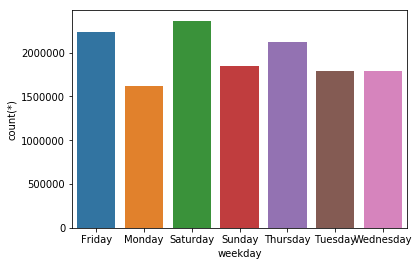

In [278]:
import seaborn as sns
sns.barplot(x = "weekday",y = "count(*)",data = df_byHour)


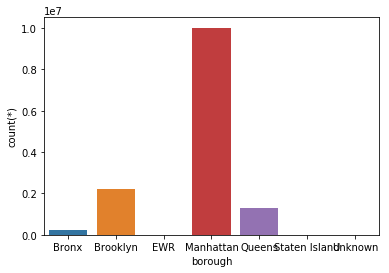

In [279]:
df_byBorough = session.execute("select borough,count(*) from uberPickups group by borough").fetchall()>>result_dicts
df_byBorough = pd.DataFrame(df_byBorough)

sns.barplot(x = "borough",y = "count(*)",data = df_byBorough)
